# 11. 분해(Decomposition)
- 큰 하나의 행렬을 여러 개의 작은 행렬로 분해
- 분해 과정에서 중요한 정보만 남게됨

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits, load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA, DictionaryLearning, FactorAnalysis, FastICA, LatentDirichletAllocation, NMF, TruncatedSVD, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 데이터 불러오기 및 시각화

In [2]:
# 붓꽃 데이터
iris, labels = load_iris(return_X_y=True)
iris_2 = load_iris()
species = np.unique(pd.Series(labels, dtype="category").cat.rename_categories(iris_2.target_names))

# 얼굴 이미지 데이터
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [3]:
# 붓꽃 데이터 그래프 생성 함수
def plot_iris(data, labels):
    colors = ["navy", "purple", "red"]
    plt.figure(figsize=(6, 5))
    for i in range(len(np.unique(labels))):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i], label=species[i])
    plt.legend()

# 얼굴 이미지 생성 함수
def show_faces(data):
    plt.figure(figsize=(7, 7))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        face = data[i].reshape(64, 64)
        plt.imshow(face, cmap=plt.cm.gray)

(150, 4)
(400, 4096)


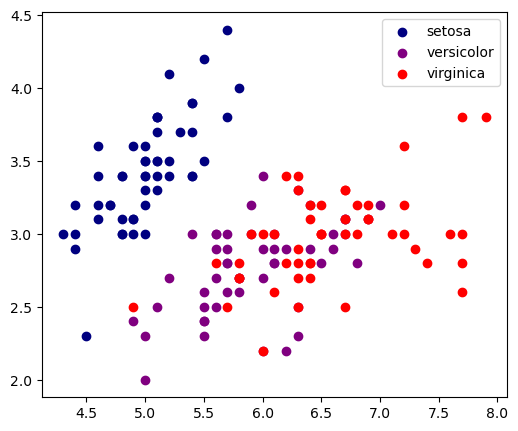

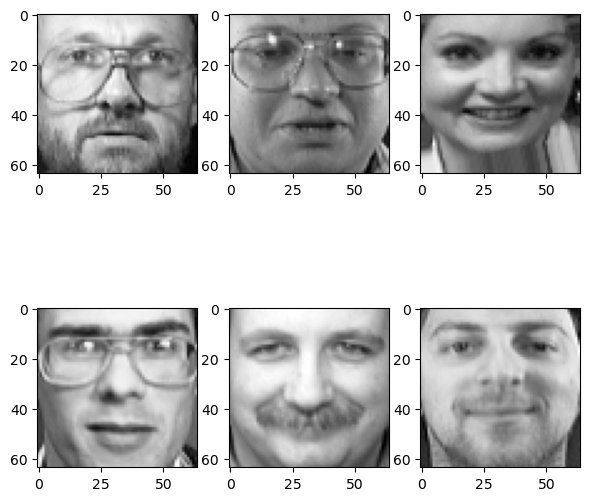

In [4]:
# 붓꽃 데이터 시각화
print(iris.shape)
plot_iris(iris, labels)

# 얼굴 이미지 데이터 시각화
print(faces.shape)
show_faces(faces)

## Principal Component Analysis(PCA, 주성분 분석)
- 전체 데이터의 분산을 가장 잘 설명하는 성분(주성분)을 생성하여 흩어져있는 데이터를 주성분에 나열하여 차원을 축소함
    - ![](images/2023-05-03-14-24-13.png)
    - ![](images/2023-05-03-14-24-35.png)
- 피처의 스케일(단위, 분포)이 다르면 올바른 주성분 방향을 찾을 수 없기 때문에 표준화를 하고 진행

### 붓꽃 데이터

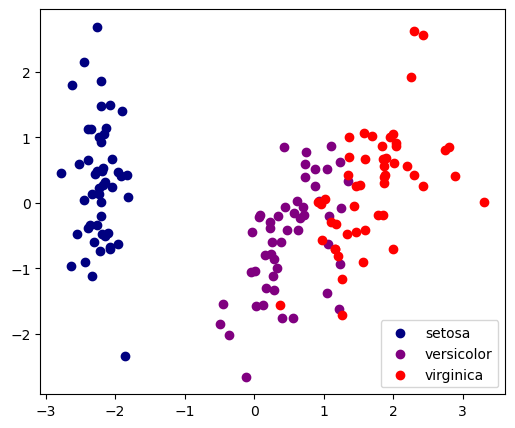

In [5]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# PCA
model = PCA(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

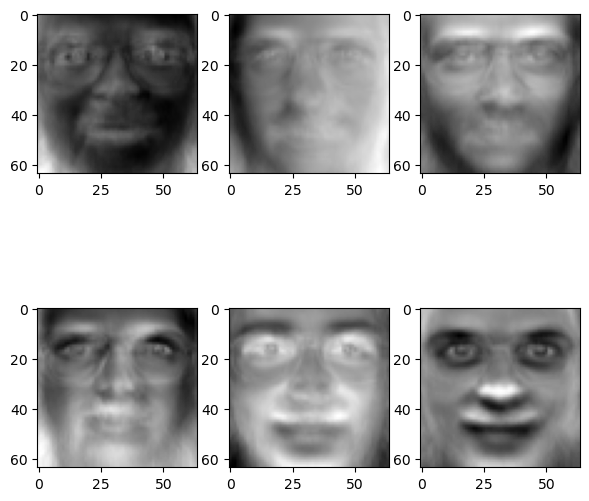

In [6]:
# PCA
model = PCA(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Incremental PCA
- PCA는 SVD 알고리즘 실행을 위해 전체 학습용 데이터 셋을 메모리에 올려야 함
- Incremental PCA는 학습 데이터를 미니 배치 단위로 나누어 사용
- 학습 데이터가 크거나 온라인으로 PCA 적용이 필요할 때 유용

### 붓꽃 데이터

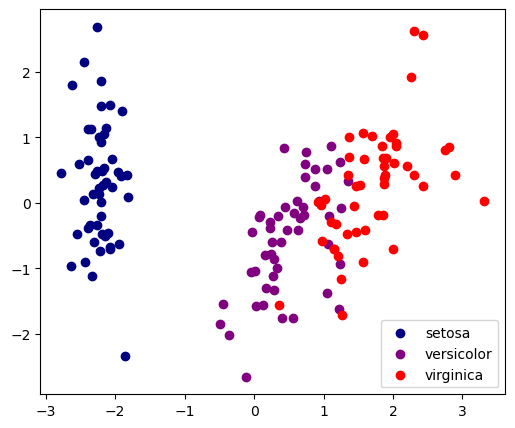

In [7]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# IncrementalPCA
model = IncrementalPCA(n_components=2)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

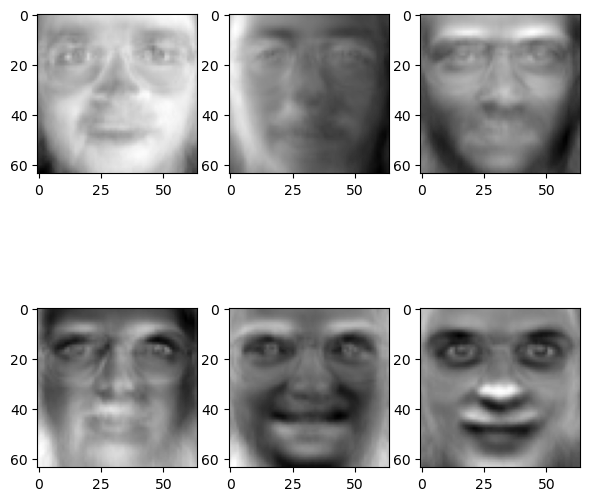

In [8]:
# IncrementalPCA
model = IncrementalPCA(n_components=6)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Kernel PCA
- 차원 축소를 위한 복잡한 비선형 투형
- components_ 메소드가 없음

### 붓꽃 데이터

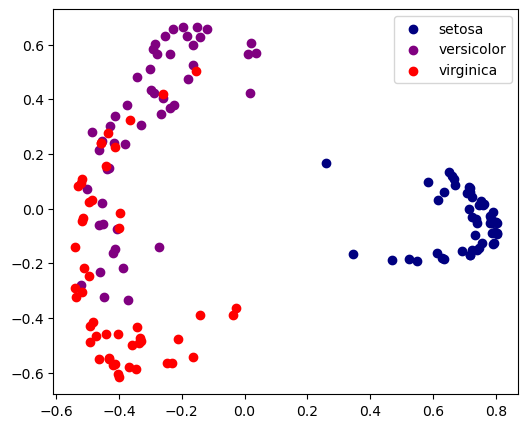

In [9]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# KernelPCA
model = KernelPCA(n_components=2, kernel="rbf", random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

## Sparse PCA
- PCA의 주요 단점 중 하나는 주성분들이 보통 모든 입력 변수들의 선형 결합으로 나타난다는 점
- 희소 주성분분석(Sparse PCA)는 몇 개 변수들만의 선형 결합으로 주성분을 나타냄으로써 이러한 단점을 극복

### 붓꽃 데이터

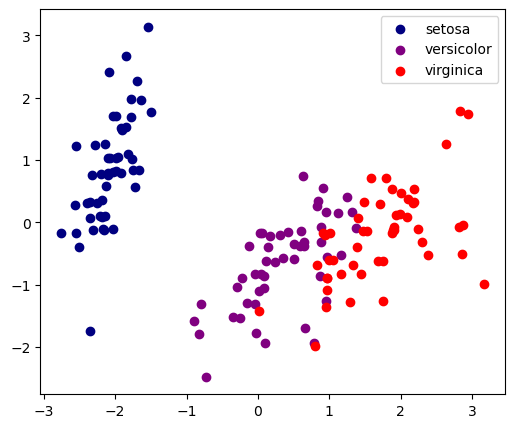

In [10]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# SparsePCA
model = SparsePCA(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

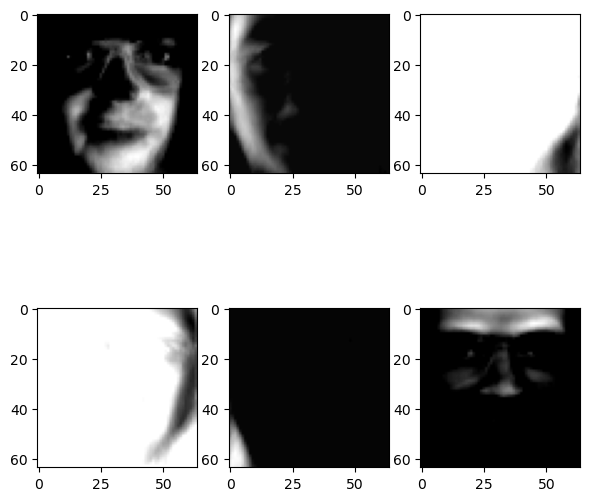

In [11]:
# SparsePCA
model = SparsePCA(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Truncated Singular Value Decomposition(Truncated SVC)
- PCA는 정방행렬(M*M)에 대해서만 행렬 분해 가능
- SVD는 정방행렬뿐만 아니라 행과 열이 다른 행렬(M*N)도 분해 가능
- PCA는 밀집행렬(Dense Matrix)에 대한 변환만 가능하지만, SVD는 희소행렬(Sparse Matrix)에 대한 변환도 가능
- 전체 행렬 크기에 대한 Full SVD를 사용하는 경우는 적음
- 특이값이 0인 부분을 모두 제거하고 차원을 줄인 Truncated SVD를 주로 사용

### 붓꽃 데이터

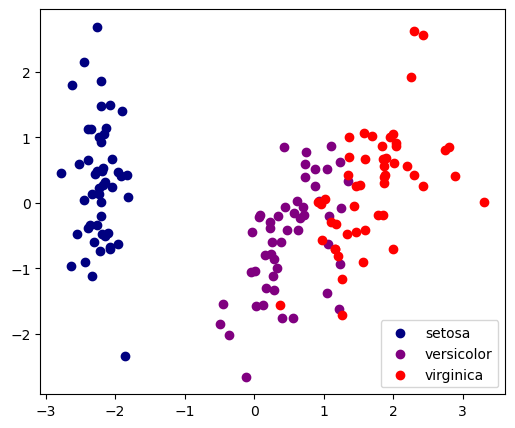

In [12]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# Truncated SVD
model = TruncatedSVD(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

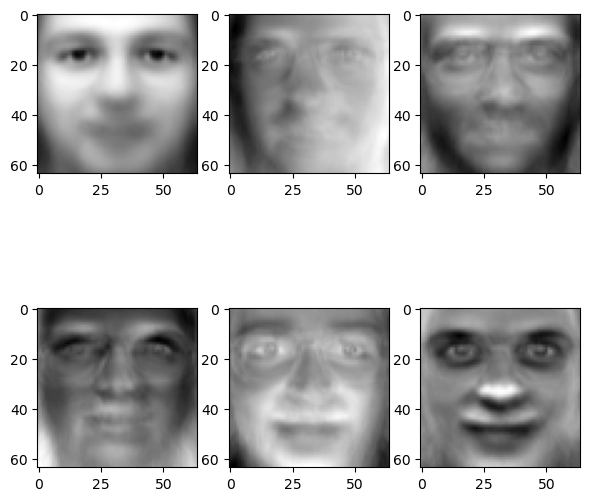

In [13]:
# TruncatedSVD
model = TruncatedSVD(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Dictionary Learning
- Sparse code를 사용하여 데이터를 가장 잘 나타내는 사전 찾기
- Sparse coding은 overcomplete 기저벡터(basis vector)를 기반으로 데이터를 효율적으로 표현하기 위해 개발
- 기저 벡터는 벡터 공간에 속하는 벡터의 집합이 선형 독립이고, 다른 모든 벡터 공간의 벡터들이 그 벡터 집합의 선형 조합으로 나타남
    - 전체 행렬에 대해서 기반으로 할 수 있는 기저벡터를 찾아냄

### 붓꽃 데이터

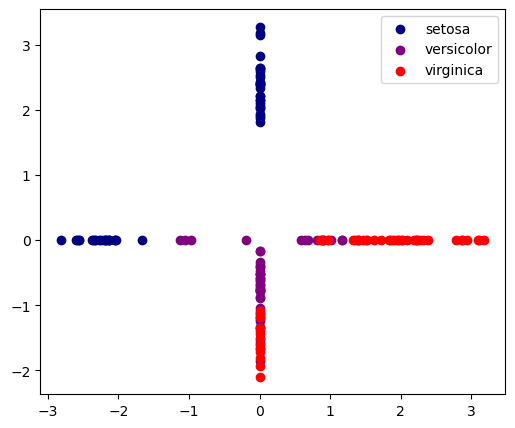

In [14]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# DictionaryLearning
model = DictionaryLearning(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

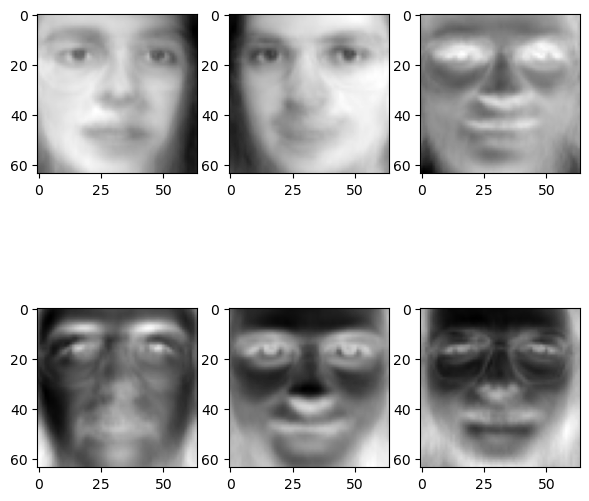

In [15]:
# DictionaryLearning
model = DictionaryLearning(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Factor Analysis
- 요인분석은 변수들 간의 상관관계를 고려하여 저변에 내재된 개념인 요인들을 추출해내는 분석 방법
- 요인분석은 변수들 간의 상관관계를 고려하여 서로 유사한 변수들끼리 묶어주는 방법
- PCA에서는 오차를 고려하지 않고, 요인분석에서는 오차를 고려

### 붓꽃 데이터

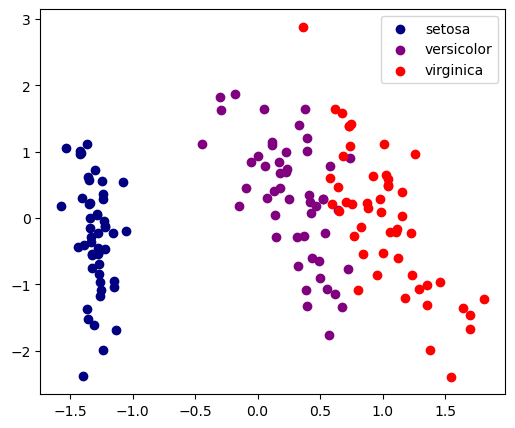

In [16]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# Factor Analysis
model = FactorAnalysis(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

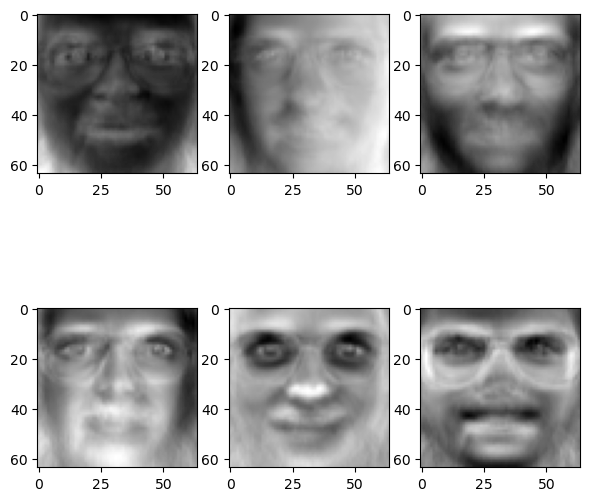

In [17]:
# Factor Analysis
model = FactorAnalysis(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Independent Component Analysis(ICA)
- 독립성분분석은 다변량의 신호를 통계적으로 독립적인 하부 성분으로 분리하는 계산 방법
- ICA는 주성분을 이용하는 점은 PCA와 유사하지만, 데이터를 가장 잘 설명하는 축을 찾는 PCA와 달리 가장 독립적인 축, 독립성이 최대가 되는 벡터를 찾음

### 붓꽃 데이터

/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


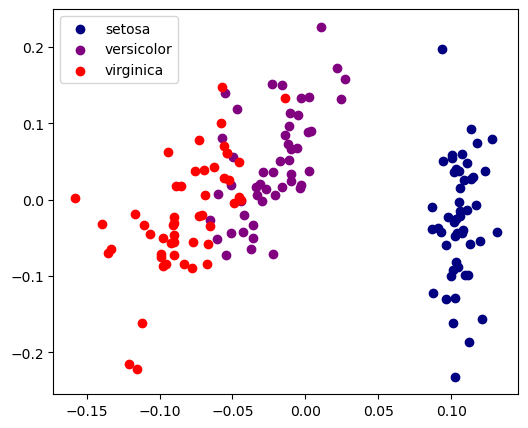

In [18]:
# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)

# FastICA
model = FastICA(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


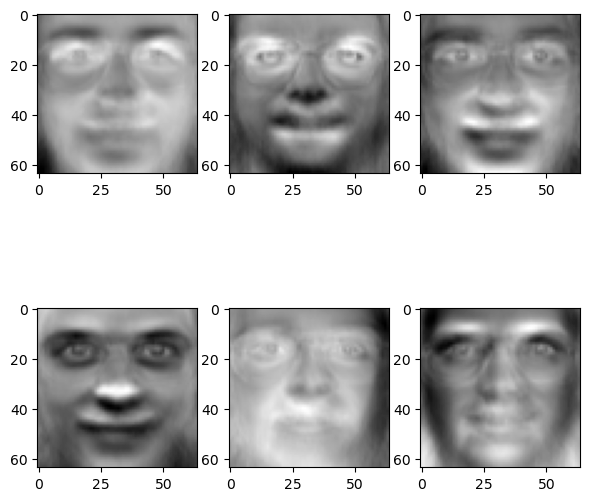

In [19]:
# FastICA
model = FastICA(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Non-negative Matrix Factorization
- 음수미포함행렬분해는 음수를 포함하지 않은 행렬 V를 음수를 포함하지 않은 행렬 W와 H의 곱으로 분해하는 알고리즘

### 붓꽃 데이터

/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


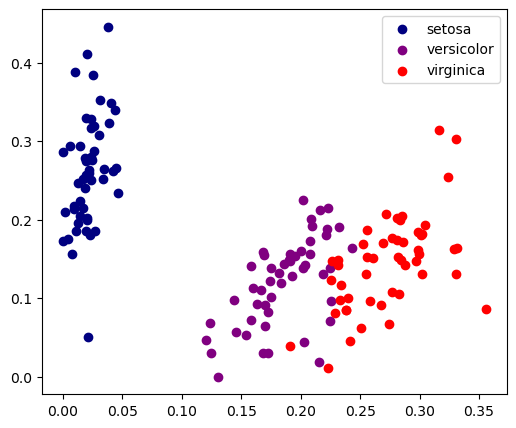

In [20]:
# 데이터 표준화
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris)

# NMF
model = NMF(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


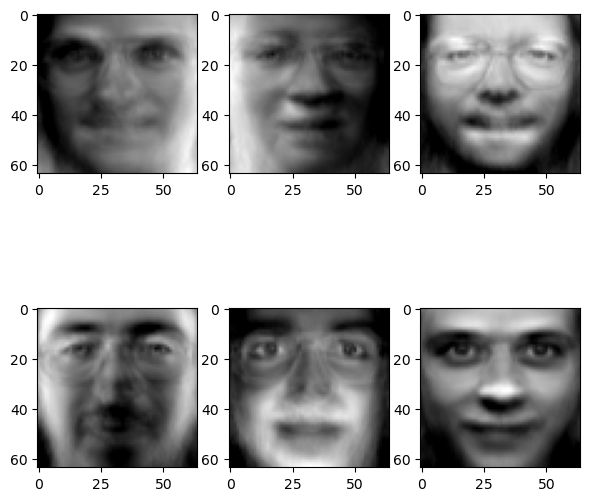

In [21]:
# NMF
model = NMF(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Latent Dirichlet Allocation(LDA)
- 잠재디리클레할당은 이산 자료들에 대한 확률적 생성 모형
- 디리클레 분포에 따라 잠재적인 의미 구조를 파악
- 문서(토픽 모델링)에서 많이 사용되는 방식

### 붓꽃 데이터

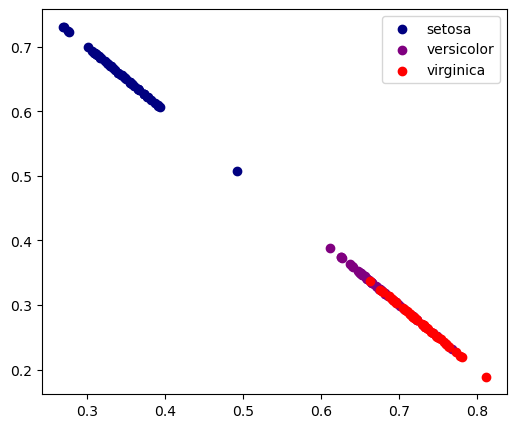

In [22]:
# 데이터 표준화
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris)

# LatentDirichletAllocation
model = LatentDirichletAllocation(n_components=2, random_state=0)
model.fit(iris_scaled)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

### 얼굴 이미지 데이터

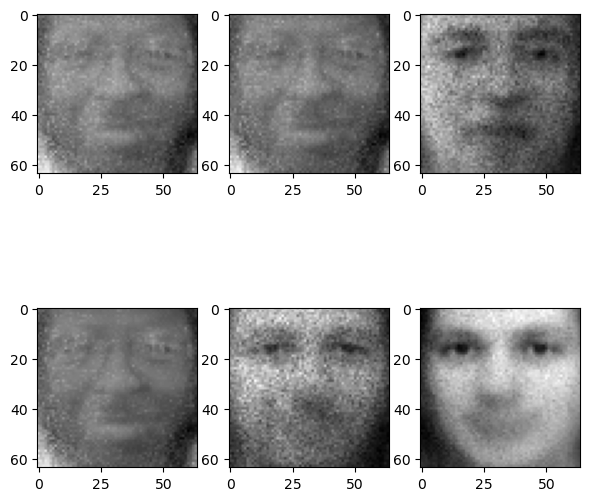

In [23]:
# LatentDirichletAllocation
model = LatentDirichletAllocation(n_components=6, random_state=0)
model.fit(faces)
components_faces = model.components_

# 시각화
show_faces(components_faces)

## Linear Discriminant Analysis(LDA)
- LDA는 PCA와 유사하게 입력 데이터 셋을 저차원 공간에 투영해 차원을 축소
- LDA는 지도학습 분류에서 사용하기 쉽도록 개별 클래스로 분별할 수 있는 기준을 최대한 유지하면서 차원 축소
    - 클래스 값을 부여해야 함(지도학습에서 사용)

### 붓꽃 데이터

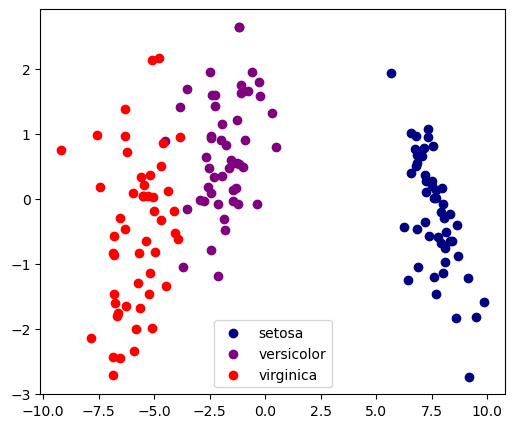

In [24]:
# 데이터 표준화
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris)

# LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(iris_scaled, labels)
transformed_iris = model.transform(iris_scaled)

# 시각화
plot_iris(transformed_iris, labels)

## 압축된 표현을 사용한 학습
- 행렬 분해를 통해 압축된 데이터를 사용해 학습

In [25]:
# 숫자 데이터 그래프 생성 함수
def plot_digits(data, labels):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    plt.figure(figsize=(15, 8))
    ax = plt.subplot(projection="3d")
    for i in range(len(data)):
        ax.text(data[i, 0], data[i, 1], data[i, 2], s=labels[i], color=plt.cm.Set1(labels[i]/10), fontdict={"weight": "bold", "size": 9})
    ax.view_init(4, -72)

# 숫자 데이터 이미지 생성 함수
def show_digits(data):
    plt.figure(figsize=(7, 7))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(data[i].reshape(8, 8))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=2.5, w_pad=1.0)


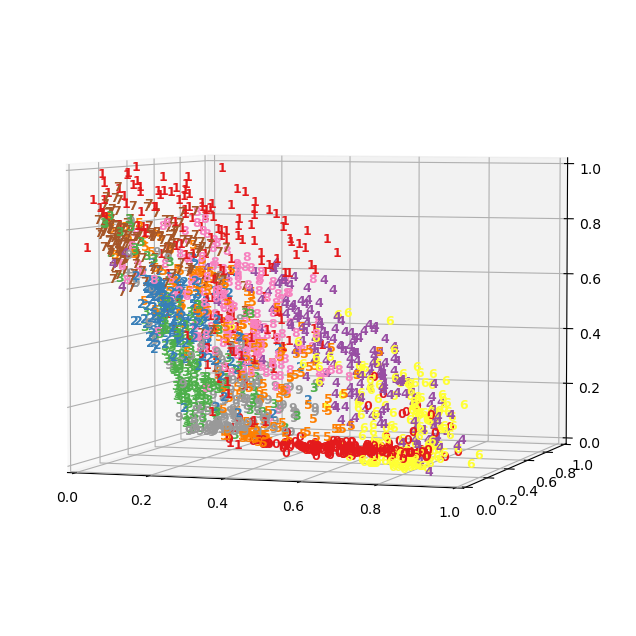

In [26]:
# 숫자 데이터
digits, labels = load_digits(return_X_y=True)

# NMF
model = NMF(n_components=3, random_state=0)
model.fit(digits)
transformed_digits = model.transform(digits)

# 숫자 데이터 그래프
plot_digits(transformed_digits, labels)

### KNN

In [27]:
# KNN
knn = KNeighborsClassifier()

# 교차검증 수행
score = cross_validate(estimator=knn,
                       X=transformed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6277298050139276 (+/- 0.01505829189044171)


### SVC

In [28]:
# SVC
svc = SVC()

# 교차검증 수행
score = cross_validate(estimator=svc,
                       X=transformed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6405122253172392 (+/- 0.02609449324169577)


### Decision Tree

In [29]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# 교차검증 수행
score = cross_validate(estimator=decision_tree,
                       X=transformed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.5715397709687403 (+/- 0.026329331094667292)


### Random Forest

In [30]:
# Random Forest
random_forest = RandomForestClassifier()

# 교차검증 수행
score = cross_validate(estimator=random_forest,
                       X=transformed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6388486536675952 (+/- 0.00946539801688473)


## 복원된 표현을 사용한 학습
- 분해 후 복원된 행렬을 사용해 학습

In [31]:
# 숫자 데이터
digits, labels = load_digits(return_X_y=True)

# NMF
model = NMF(n_components=3, random_state=0)
model.fit(digits)

# 분해된 숫자 데이터
decomposed_digits = model.transform(digits)
components_digits = model.components_

# 복원된 숫자 데이터
reconstructed_digits = model.inverse_transform(decomposed_digits)

print(digits.shape)
print(decomposed_digits.shape)
print(components_digits.shape)
print(reconstructed_digits.shape)

(1797, 64)
(1797, 3)
(3, 64)
(1797, 64)


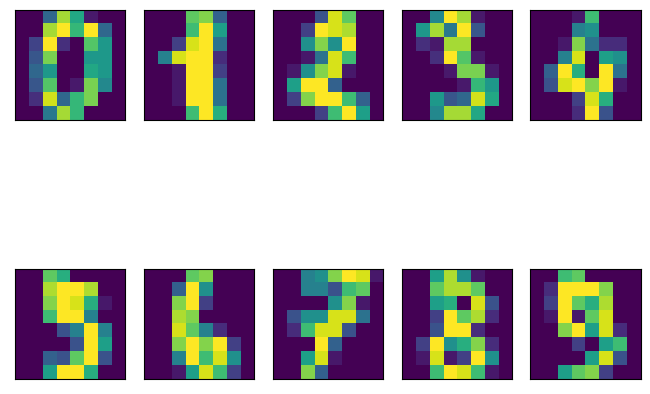

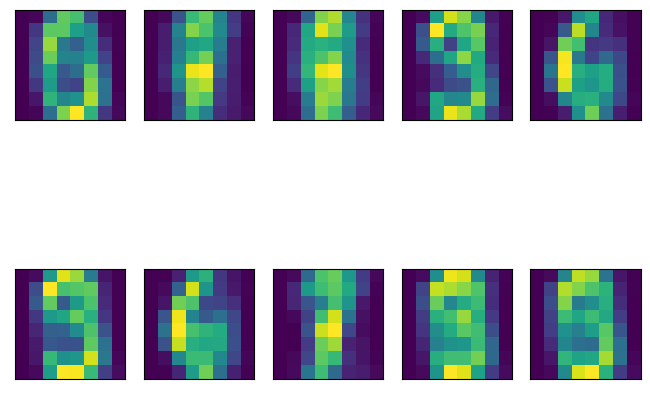

In [32]:
# 원본 숫자 데이터 이미지
show_digits(digits)

# 복원된 숫자 데이터 이미지
show_digits(reconstructed_digits)

### KNN

In [33]:
# KNN
knn = KNeighborsClassifier()

# 교차검증 수행
score = cross_validate(estimator=knn,
                       X=reconstructed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6293980191891057 (+/- 0.029204057950992585)


### SVC

In [34]:
# SVC
svc = SVC()

# 교차검증 수행
score = cross_validate(estimator=svc,
                       X=reconstructed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6221525843392138 (+/- 0.014752290768354546)


### Decision Tree

In [35]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# 교차검증 수행
score = cross_validate(estimator=decision_tree,
                       X=reconstructed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.5720767564221603 (+/- 0.012925380282340087)


### Random Forest

In [36]:
# Random Forest
random_forest = RandomForestClassifier()

# 교차검증 수행
score = cross_validate(estimator=random_forest,
                       X=reconstructed_digits, y=labels,
                       cv=5)

# 교차검증 결과
print("mean cross val score: {} (+/- {})".format(score["test_score"].mean(), score["test_score"].std()))

mean cross val score: 0.6377359950479727 (+/- 0.020406752465756555)


## 이미지 복원

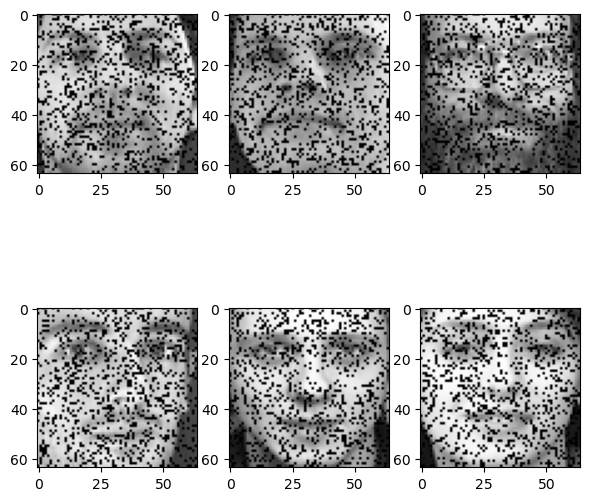

In [37]:
# 얼굴 이미지 데이터
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
train_faces, test_faces = train_test_split(faces, test_size=0.1, random_state=0)

# 손상된 이미지
damaged_faces = []
for test in test_faces:
    idx = np.random.choice(4096, size=1024)
    test[idx] = 0.0
    damaged_face = test
    damaged_faces.append(damaged_face)
damaged_faces = np.asarray(damaged_faces, dtype="float32")

# 손상된 얼굴 이미지
show_faces(damaged_faces)

/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/Users/yanghaejun/miniforge3/envs/yang_tf/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


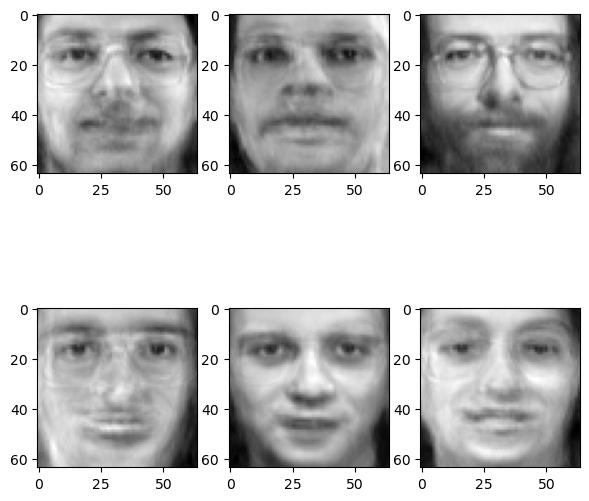

In [38]:
# NMF
model = NMF(n_components=100, random_state=0)
model.fit(train_faces)
transformed_damaged_faces = model.transform(damaged_faces)
reconstructed_faces = model.inverse_transform(transformed_damaged_faces)

# 시각화
show_faces(reconstructed_faces)